# 1.ความนิยมอนิเมะญี่ปุ่นในประเทศไทย






# 2.แหล่งข้อมูล
เก็บจากเว็บไซต์
- https://pantip.com/  
- https://www.dek-d.com
- ... 

# 2.1 ลักษณะของแหล่งข้อมูล
เก็บข้อมูลในลักษณะ Web element โดยใช้ selenium 


# ขั้นตอนการเขียนโปรแกรม



```
# This is formatted as code
```

ติดตั้ง selenium module

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 911kB 10.6MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubun

แหล่งข้อมูลที่เลือกมา

In [ ]:
#1
pantip_url = 'https://pantip.com/tag/การ์ตูนทีวี'
#2
DekD_url = 'https://www.dek-d.com/search/?q=การ์ตูน&page='


# การดึงข้อมูลมาจากเว็บไซต์ pantip

In [ ]:
#สร้าง list เพื่อมาเก็บข้อมูลจาก Pantip
keep_pantip_time = [] #เก็บเวลา
keep_pantip_topic = [] #เก็บหัวข้อ
keep_pantip_user = [] #เก็บหมายเลขสมาชิก หรือ ชื่อผู้ใช้งาน
keep_pantip_link = [] #เก็บ link ของหัวข้อ

In [ ]:
from selenium import webdriver 
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.common.keys import Keys
import time 

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('—-incognito')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser.get(pantip_url) #link ที่ทำการดึงข้อมูลมา
time.sleep(1)
# ทำการเลื่อนหน้า page ลงเพื่อโหลดหน้า page
# 50 ข้อมูลต่อ 1 page ที่โหลดหน้า page
# ข้อมูลที่ page โหลดไว้ก่อนหน้านี้คือ 50 ดังนั้นการเลื่อน page ลงจนสุด 1ครั้ง จะได้จำนวนแถวข้อมูลเท่ากับ 50 * (จำนวน rage + 1)

try:
  old_row = 0
  new_row = 0
  while True: #เลื่อน page ลงไปเลื่อนๆ จะหยุดเมื่อได้จำนวนข้อมูลที่ต้องการ
    div_tag = browser.find_element_by_id('pt-topic-left')
    li_tag = div_tag.find_elements_by_class_name('pt-list-item')
    new_row = len([i for i in li_tag])
    if new_row == old_row: 
      print('All page row =',new_row)
      break
    old_row = new_row
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight);") #เลื่อนลงไปจนสุด page
    time.sleep(5) #พักโปรแกรมไป 5 วินาที
except WebDriverException:
  print('Page crash.')

#ทำการหา element ที่ต้องการดึงข้อมูล
div_tag = browser.find_element_by_id('pt-topic-left') #หาตำแหน่งที่ id มีค่าเท่ากับ pt-topic-left ซึ่งอยู่ใน div_tag
li_tag = div_tag.find_elements_by_class_name('pt-list-item') #หาตำแหน่งที่ class มีค่าเท่ากับ pt-topic-left ซึ่งอยูใน li tag

count=0
for i in li_tag:
  count+=1
  date_time = i.find_element_by_class_name('pt-list-item__info').find_element_by_tag_name('span').get_attribute('title') #เวลา
  topic = i.find_element_by_tag_name('h2').text #หัวข้อ
  user = i.find_element_by_tag_name('h5').text #หมายเลขสมาชิก หรือ ผู้ใช้งาน
  link = i.find_element_by_tag_name('a').get_attribute('href') #url ของหัวข้อ

  #เก็บข้อมูลจาก text หรือค่า attribute ของ Web element ลงไปใน list ที่กำหนดไว้
  keep_pantip_time.append(date_time)
  keep_pantip_topic.append(topic)
  keep_pantip_user.append(user)
  keep_pantip_link.append(link)
  print(count,link,topic,user,date_time)
  time.sleep(1)#หยุดการทำงานของโปรแกรม 1 วินาที ดังนั้นจะได้ 1 วินาที ต่อ 1 แถว ข้อมูล

browser.quit() #ปิด browser

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


Streaming output truncated to the last 5000 lines.
5201 https://pantip.com/topic/37502794 โคนันตั้งแต่ปีใหม่เป็นต้นมา จนถึงตอนนี้ สมาชิกหมายเลข 4057899 26 มีนาคม 2561 เวลา 12:48 น.
5202 https://pantip.com/topic/37502727 สรุปผลการต่อสู้ระหว่าง Xeno Goku ร่าง SSJ4 กับ Super Goku ร่าง SSB (ช่วงหลังศึกประชันพลัง) ใน Super Dragon Ball Heroes flit asuno 26 มีนาคม 2561 เวลา 12:30 น.
5203 https://pantip.com/topic/37501844 ทราวฟาก้า ลอว์ VS นิโค โรบิน คนใหนเก่งกว่ากัน และดูเท่ สมาชิกหมายเลข 4437259 26 มีนาคม 2561 เวลา 07:55 น.
5204 https://pantip.com/topic/37501564 ใครพอจะรู้จักการ์ตูนช่องthaipbsบ้าง สมาชิกหมายเลข 4442351 26 มีนาคม 2561 เวลา 06:39 น.
5205 https://pantip.com/topic/37500948 ความสามารถที่เบนจามินใช้ติดตาม คามิลล่า (ความสามารถที่ได้จากลูกน้อง) สมาชิกหมายเลข 4148639 26 มีนาคม 2561 เวลา 03:23 น.
5206 https://pantip.com/topic/37500559 ขึ้นชื่อว่าเงื่อนไขเน็น ยิ่งยากยิ่งให้ผลลัพธ์ ความรุนแรง ประสิทธิภาพสูง สมาชิกหมายเลข 4100040 25 มีนาคม 2561 เวลา 23:02 น.
5207 https://pantip.com/topic

นำ list ที่เก็บข้อมูลมาทำเป็น DataFrame  และรวมข้อมูลเก็บข้อมูลไว้ในไฟล์ Excle

In [ ]:
import pandas as pd

In [ ]:
#DataFrame ของข้อมูลเว็บไซต์ pantip
df_pantip = pd.DataFrame([keep_pantip_link,keep_pantip_topic,keep_pantip_user,keep_pantip_time]).transpose()
df_pantip.columns = ['Url','Topic','User','Time']
keep_df_pantip = df_pantip
df_pantip

,Url,Topic,User,Time
0,https://pantip.com/topic/40643311,ตามหาการ์ตูนมันๆ นอกเหนือจาก ไซตามะ ดาบพิฆาตอส...,Jaruad,15 เมษายน 2564 เวลา 10:05 น.
1,https://pantip.com/topic/40643157,Osananajimi ga Zettai ni Makenai Love comeใครค...,สมาชิกหมายเลข 6406257,15 เมษายน 2564 เวลา 07:20 น.
2,https://pantip.com/topic/40642688,ช่วยตามหาอนิเมะเรื่องนี้หน่อยได้มั้ยครับ!,สมาชิกหมายเลข 4666726,14 เมษายน 2564 เวลา 21:43 น.
3,https://pantip.com/topic/40641243,log horizon แบบอนิเมะหาดูแบบถูกลิขสิทธิ์ได้ที่...,สมาชิกหมายเลข 5034793,14 เมษายน 2564 เวลา 01:51 น.
4,https://pantip.com/topic/40640811,ตามหาการ์ตูนสมัยยังเด็กจ้าาา,นายอวกาศ,13 เมษายน 2564 เวลา 21:14 น.
...,...,...,...,...
10195,https://pantip.com/topic/34893452,อยากถามเรื่องกฎเเฟนซับครับ,สมาชิกหมายเลข 2340676,10 มีนาคม 2559 เวลา 05:58 น.
10196,https://pantip.com/topic/34892803,(One piece)ถ้า ซามูไร ริวมะ (ซอมบี้) ได้เงาของ...,มนุษย์ดึกดำบรรพ์,10 มีนาคม 2559 เวลา 03:19 น.
10197,https://pantip.com/topic/34892599,การ์ตูนที่เคยเป็นการ์ตูนฝรั่งสั้นๆคั่นระหว่างเ...,หัวโต๊โตตาตี๊ตี่,10 มีนาคม 2559 เวลา 02:15 น.
10198,https://pantip.com/topic/34892429,คือผมไม่เข้าใจ คอนเซ็ป ของ คาเมนไรเดอร์ โกสต์ ...,skirmish,10 มีนาคม 2559 เวลา 00:41 น.


In [ ]:
#Save ข้อมูลเว็บไซต์ pantip ลงไฟล์ Excle
with pd.ExcelWriter('เก็บข้อมูล_Pantip.xlsx') as Pantip_writer:  
    keep_df_pantip.to_excel(Pantip_writer)

# การดึงข้อมูลจากเว็บไซต์ Dek-d.com

In [ ]:
# สร้าง list เพื่อเก็บข้อมูลจาก Dek-d
keep_dekd_user = []
keep_dekd_topic = []
keep_dekd_time = []
keep_dekd_link = []

In [ ]:
#การดึงข้อมูลจากเว็บ Dek-d โดยใช้ BeautifulSoup
import requests
from bs4 import BeautifulSoup
import time

#สร้าง header เพื่อแสดงตัวตน
#หากไม่สร้าง header จะได้ response 403
header = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
      }

count = 0
all_link = [] #เก็บ link ทั้งหมด จากการ loop

#หน้า page ของ link มี 238 หน้า
page_number = 0

while True:
  page_number += 1
  url = DekD_url + f'{page_number}' #i จะแทนด้วยเลขหน้า
  r = requests.get(url,headers=header)
  time.sleep(5)
  soup = BeautifulSoup(r.content, features='html.parser')
  if len([i for i in soup.find_all('li',{'class':'taglist-main-li'})]) == 0:
    break
  for i in soup.find_all('li',{'class':'taglist-main-li'}):
    #ทำ try และ except ป้องกัน error จาก user ที่ไม่มีชื่อใน tag
    try:
        user = i.find('a',{'class':'a-ownser'}).text.strip()
    except AttributeError:
        try:
          #เป็นชื่อ user ที่ไม่ได้อยู่ใน tag ใดๆเลย ดังนั้นจึงใช้คำสั่ง next_sibling ดึง text หลังจาก tag นั้น (เป็น guess user name) 
          user = i.find('div',{'class':'minwidthX'}).next_sibling.strip()
        except: #ป้องกกันการ Error จากการหา tag ที่กำหนดไว้ไม่เจอ
          user = 'No data'
        
          
    count+=1

    topic = i.find('a',{'class':'taglist-title'}).text.strip()
    date_time = i.find('span').text.strip()
    link = i.find('a',href=True)['href'].strip()
   
    keep_dekd_user.append(user)
    keep_dekd_topic.append(topic)
    keep_dekd_time.append(date_time)
    keep_dekd_link.append(link)
        
    print(count,link,topic,user,date_time)
    time.sleep(1)


Streaming output truncated to the last 5000 lines.
2270 https://www.dek-d.com/board/view/3499328/ เมื่อซอมบี้บุกโลกดิสนีย์ เหล่าตัวการ์ตูนจึงต้องเปลี่ยนเป็นนักฆ่าสายโหด มาชมกันเลย! 62442 07/05/58
2271 https://www.dek-d.com/board/view/3499325/ จะเป็นอย่างไร? เมื่อเหล่า “การ์ตูนตัวเหลือง” ถูก X-Ray ให้เห็นภายใน มาชม! 62442 07/05/58
2272 https://www.dek-d.com/board/view/3499265/ ช่วยแนะนำการ์ตูนแนวเรื่องโค้ด กีอัส ให้ทีครับ foug 07/05/58
2273 https://www.dek-d.com/board/view/3499260/ Welcome AEC-Byคนบ้าการ์ตูน #มาช่วยวาดให้ที alice0072 07/05/58
2274 https://www.dek-d.com/board/view/3499133/ ช่วยแนะนำการ์ตูนหน่อย Dust1919 07/05/58
2275 https://my.dek-d.com/Tammykamonchanok/funnyquiz/?id=270578 คุณเป็นตัวการ์ตูนใดในsanrio Tammykamonchanok 07/05/58
2276 https://my.dek-d.com/tamakorn2152/funnyquiz/?id=270546 คุณรู้จักการ์ตูนญี่ปุ่นมากแค่ไหน tamakorn2152 07/05/58
2277 https://www.dek-d.com/board/view/3499048/ เมื่อ Game of Thrones กลายเป็นการ์ตูนสไตล์ Disney แมวดำตัวน้อยแสนซน 07/05/58
2278 htt

นำ list ที่เก็บข้อมูลมาทำเป็น DataFrame และรวมข้อมูล

In [ ]:
#DataFrame ของ Dek-d
df_dekd = pd.DataFrame([keep_dekd_link,keep_dekd_topic,keep_dekd_user,keep_dekd_time]).transpose()
df_dekd.columns = ['Url','Topic','User','Time']
df_dekd

,Url,Topic,User,Time
0,,,No data,แนะนำ
1,https://www.dek-d.com/board/view/4012073/,ช่วยแนะนำตัวละครอนิเมะ/การ์ตูนที่มีปีกให้หน่อยค่ะ,HikkaTakanachi,12 ชั่วโมง ที่แล้ว
2,https://writer.dek-d.com/pancake321/writer/vie...,ฉันหลุดเข้าไปเป็นนางเอกของการ์ตูน,pancake321,1 วัน ที่แล้ว
3,https://www.dek-d.com/board/view/4011599/,แนะนำอนิเมะ(การ์ตูน) ที่ชีวิตนี้ควรดู,MapSmith,6 วัน ที่แล้ว
4,https://writer.dek-d.com/sonnyxpd/writer/view....,นิยาย( FIC INAZUMA ILEVEN GO) ชั้นเกีดใหม่ในโล...,sonnyxpd,06/04/64
...,...,...,...,...
7263,https://writer.dek-d.com/llwsza123/writer/view...,ศึกษาวิชา การ์ตูนศาสตร์,รักนะ..ดงบังชินกิ,01/01/13
7264,https://writer.dek-d.com/oishijung/writer/view...,ใครรู้บ้างว่าจะหาซื้อการ์ตูนyoaiได้ที่ไหน,Ph.Dr.Bulin<homo>,01/01/13
7265,https://writer.dek-d.com/yuya_f/writer/view.ph...,รักหมดใจยัยบ้าการ์ตูน,[เ][ลื][อ][ก][ที่][จ][ะ][ร][อ],01/01/13
7266,https://my.dek-d.com//funnyquiz/?id=65583,ลักษณะนิสัยของคุณ ตรงกับตัวการ์ตูนตัวไหนมากที่สุด,-,


เนื่องจากข้อมูลที่เก็บได้จากเว็บไซต์ Dek-d มีตัวอักษรที่เป็น IllegalCharacterError ทำให้ Export ข้อมูลที่เก็บมาเป็นไฟล์ Excle ไม่ได้

In [ ]:
#ติดตั้ง module xlsxwriter เพื่อช่วยในการ Export ข้อมูลที่มีลักษณะ IllegalCharacterError เป็นไฟล์ Excle ได้
!pip install xlsxwriter

     |████████████████████████████████| 153kB 11.6MB/s 


In [ ]:
import xlsxwriter

df_dekd.to_excel('เก็บข้อมูล_Dekd.xlsx',engine='xlsxwriter')

# 2.2 จำนวนข้อมูลที่เก็บได้

ทำการเปิดไฟล์ข้อมูลจากไฟล์ Excle ที่ได้ทำการเก็บข้อมูลไว้

In [ ]:
#Pantip
exc_df_pantip = pd.read_excel('/content/สำรอง_Pantip.xlsx')
exc_df_pantip

,Unnamed: 0,Url,Topic,User,Time
0,0,https://pantip.com/topic/40642688,ช่วยตามหาอนิเมะเรื่องนี้หน่อยได้มั้ยครับ!,สมาชิกหมายเลข 4666726,14 เมษายน 2564 เวลา 21:43 น.
1,1,https://pantip.com/topic/40641243,log horizon แบบอนิเมะหาดูแบบถูกลิขสิทธิ์ได้ที่...,สมาชิกหมายเลข 5034793,14 เมษายน 2564 เวลา 01:51 น.
2,2,https://pantip.com/topic/40640811,ตามหาการ์ตูนสมัยยังเด็กจ้าาา,นายอวกาศ,13 เมษายน 2564 เวลา 21:14 น.
3,3,https://pantip.com/topic/40639939,looney tunes bugs bunny มีใครจำตอนนักวิทยาศาสต...,สมาชิกหมายเลข 5377240,13 เมษายน 2564 เวลา 11:59 น.
4,4,https://pantip.com/topic/40639682,เจ็ดเทพม.ปลายกับการใช้ชีวิตสบายๆในต่างโลกจะมีภ...,สมาชิกหมายเลข 6348174,13 เมษายน 2564 เวลา 08:39 น.
...,...,...,...,...,...
11845,11845,https://pantip.com/topic/33578611,"กระทู้โหวต ""ห้องการ์ตูน Favorite Anime Winter ...",olokung,29 เมษายน 2558 เวลา 08:28 น.
11846,11846,https://pantip.com/topic/33578301,พอจะนึกอนิเมะเรื่องนี้ออกไม๊ครับ,สมาชิกหมายเลข 853834,29 เมษายน 2558 เวลา 02:40 น.
11847,11847,https://pantip.com/topic/33577580,One pieceพากย์ไทย ถ้าไม่ใช่dex ค่ายอื่นไม่คิดจ...,พราวหนึ่งเดียวในหัวใจ,28 เมษายน 2558 เวลา 22:45 น.
11848,11848,https://pantip.com/topic/33577393,สอบถามเรื่อง นิยาย เรียกเธอว่าพระเจ้า สึซึมิยะ...,สมาชิกหมายเลข 1214259,28 เมษายน 2558 เวลา 22:11 น.


In [ ]:
exc_df_dekd = pd.read_excel('/content/เก็บข้อมูล_Dekd.xlsx')
exc_df_dekd

,Unnamed: 0,Url,Topic,User,Time
0,0,NaN,NaN,No data,แนะนำ
1,1,https://www.dek-d.com/board/view/4012073/,ช่วยแนะนำตัวละครอนิเมะ/การ์ตูนที่มีปีกให้หน่อยค่ะ,HikkaTakanachi,12 ชั่วโมง ที่แล้ว
2,2,https://writer.dek-d.com/pancake321/writer/vie...,ฉันหลุดเข้าไปเป็นนางเอกของการ์ตูน,pancake321,1 วัน ที่แล้ว
3,3,https://www.dek-d.com/board/view/4011599/,แนะนำอนิเมะ(การ์ตูน) ที่ชีวิตนี้ควรดู,MapSmith,6 วัน ที่แล้ว
4,4,https://writer.dek-d.com/sonnyxpd/writer/view....,นิยาย( FIC INAZUMA ILEVEN GO) ชั้นเกีดใหม่ในโล...,sonnyxpd,06/04/64
...,...,...,...,...,...
7263,7263,https://writer.dek-d.com/llwsza123/writer/view...,ศึกษาวิชา การ์ตูนศาสตร์,รักนะ..ดงบังชินกิ,01/01/13
7264,7264,https://writer.dek-d.com/oishijung/writer/view...,ใครรู้บ้างว่าจะหาซื้อการ์ตูนyoaiได้ที่ไหน,Ph.Dr.Bulin<homo>,01/01/13
7265,7265,https://writer.dek-d.com/yuya_f/writer/view.ph...,รักหมดใจยัยบ้าการ์ตูน,[เ][ลื][อ][ก][ที่][จ][ะ][ร][อ],01/01/13
7266,7266,https://my.dek-d.com//funnyquiz/?id=65583,ลักษณะนิสัยของคุณ ตรงกับตัวการ์ตูนตัวไหนมากที่สุด,-,NaN


In [ ]:
print('Web scraping from pantip.com')
print('rows = {} columns = {}'.format(exc_df_pantip.shape[0],exc_df_pantip.shape[1]))
print('-'*50)
print('Web scraping from dek-d.com')
print('rows = {} columns = {}'.format(exc_df_dekd.shape[0],exc_df_dekd.shape[1]))


Web scraping from pantip.com
rows = 11850 columns = 5
--------------------------------------------------
Web scraping from dek-d.com
rows = 7268 columns = 5


# 3.1 โครงสร้างข้อมูลที่ออกแบบ
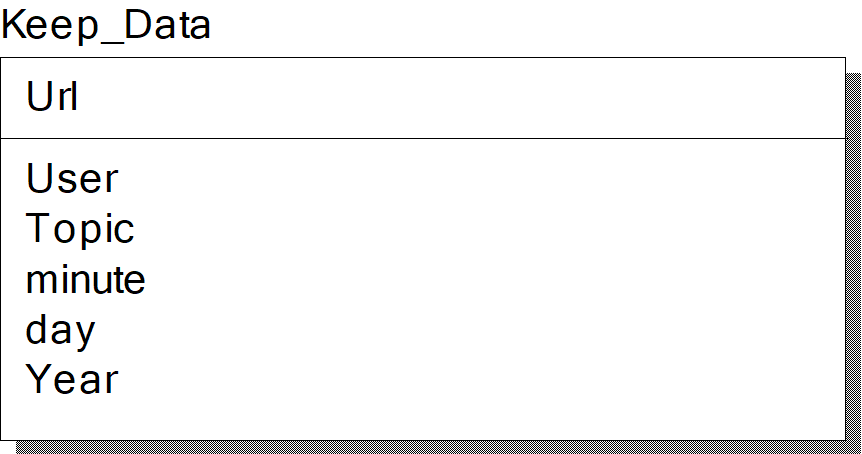

# 3.2 ขั้นตอนการเลือก/การทำความสะอาดข้อมูล

# 3.2.1 Pantip

เช็คจำนวน link ที่ซ้ำกัน

In [ ]:
#Pantip
print('Duplicates Link =',len(exc_df_pantip[exc_df_pantip.duplicated(subset=["Url"])]))

Duplicates Link = 2


In [ ]:
exc_df_pantip.drop_duplicates(subset=["Url"], inplace=True)
print('Duplicates Link =',len(exc_df_pantip[exc_df_pantip.duplicated(subset=["Url"])]))

Duplicates Link = 0


เช็ค และลบข้อมูลที่ซ้ำกัน

In [ ]:
#pantip 
#เช็คโพสต์ที่ซ้ำกัน ของ user นั้น
if len(exc_df_pantip[exc_df_pantip.duplicated(subset=["Topic","User"])]) >= 1:
  print('Duplicates Data!',len(exc_df_pantip[exc_df_pantip.duplicated(subset=["Topic","User"])]),'Row!')
  print(exc_df_pantip[exc_df_pantip.duplicated(["Topic","User"])])
  exc_df_pantip.drop_duplicates(subset=["Topic","User"], inplace=True) #ลบแถวที่มี Topic ซ้ำกัน
else:
  print('No Duplicates Data.')


Duplicates Data! 26 Row!
       Unnamed: 0  ...                              Time
198           198  ...  16 กุมภาพันธ์ 2564 เวลา 23:27 น.
429           429  ...     14 ธันวาคม 2563 เวลา 08:48 น.
634           634  ...      16 ตุลาคม 2563 เวลา 17:59 น.
815           815  ...     15 สิงหาคม 2563 เวลา 15:05 น.
1444         1444  ...      12 เมษายน 2563 เวลา 00:26 น.
1469         1469  ...       8 เมษายน 2563 เวลา 20:06 น.
1878         1878  ...       6 มกราคม 2563 เวลา 18:50 น.
2793         2793  ...    12 มิถุนายน 2562 เวลา 09:00 น.
2797         2797  ...    11 มิถุนายน 2562 เวลา 18:44 น.
3114         3114  ...      11 เมษายน 2562 เวลา 16:39 น.
3428         3428  ...  20 กุมภาพันธ์ 2562 เวลา 21:44 น.
4476         4476  ...     11 สิงหาคม 2561 เวลา 00:57 น.
4763         4763  ...     8 มิถุนายน 2561 เวลา 21:51 น.
5332         5332  ...       6 มีนาคม 2561 เวลา 20:41 น.
5859         5859  ...      6 ธันวาคม 2560 เวลา 12:29 น.
6335         6335  ...     28 กันยายน 2560 เวลา 15:07 น.
6359  

เช็คข้อมูลขาดหาย

In [ ]:
exc_df_pantip.isnull().sum()

Unnamed: 0    0
Url           0
Topic         2
User          0
Time          0
dtype: int64

ลบข้อมูลขาดหาย

In [ ]:
exc_df_pantip.dropna(inplace=True)
exc_df_pantip.isnull().sum()

Unnamed: 0    0
Url           0
Topic         0
User          0
Time          0
dtype: int64

ทำการแยก cloumn ของ time โดยใช้ regular expression

In [ ]:
#pantip
exc_df_pantip['Minute'] = exc_df_pantip['Time'].str.extract('(\d{2}:\d{2}\s+น.)')
exc_df_pantip['Day'] = exc_df_pantip['Time'].str.extract('(\d{2})')
exc_df_pantip['Month'] = exc_df_pantip['Time'].str.extract('\d{2}\s+([ก-๙]{2,})')
exc_df_pantip['Year'] = exc_df_pantip['Time'].str.extract('(\d{4})')
#ลบ column ที่มีค่า Time
exc_df_pantip = exc_df_pantip.drop(columns=['Time'])
exc_df_pantip


,Unnamed: 0,Url,Topic,User,Minute,Day,Month,Year
0,0,https://pantip.com/topic/40642688,ช่วยตามหาอนิเมะเรื่องนี้หน่อยได้มั้ยครับ!,สมาชิกหมายเลข 4666726,21:43 น.,14,เมษายน,2564
1,1,https://pantip.com/topic/40641243,log horizon แบบอนิเมะหาดูแบบถูกลิขสิทธิ์ได้ที่...,สมาชิกหมายเลข 5034793,01:51 น.,14,เมษายน,2564
2,2,https://pantip.com/topic/40640811,ตามหาการ์ตูนสมัยยังเด็กจ้าาา,นายอวกาศ,21:14 น.,13,เมษายน,2564
3,3,https://pantip.com/topic/40639939,looney tunes bugs bunny มีใครจำตอนนักวิทยาศาสต...,สมาชิกหมายเลข 5377240,11:59 น.,13,เมษายน,2564
4,4,https://pantip.com/topic/40639682,เจ็ดเทพม.ปลายกับการใช้ชีวิตสบายๆในต่างโลกจะมีภ...,สมาชิกหมายเลข 6348174,08:39 น.,13,เมษายน,2564
...,...,...,...,...,...,...,...,...
11845,11845,https://pantip.com/topic/33578611,"กระทู้โหวต ""ห้องการ์ตูน Favorite Anime Winter ...",olokung,08:28 น.,29,เมษายน,2558
11846,11846,https://pantip.com/topic/33578301,พอจะนึกอนิเมะเรื่องนี้ออกไม๊ครับ,สมาชิกหมายเลข 853834,02:40 น.,29,เมษายน,2558
11847,11847,https://pantip.com/topic/33577580,One pieceพากย์ไทย ถ้าไม่ใช่dex ค่ายอื่นไม่คิดจ...,พราวหนึ่งเดียวในหัวใจ,22:45 น.,28,เมษายน,2558
11848,11848,https://pantip.com/topic/33577393,สอบถามเรื่อง นิยาย เรียกเธอว่าพระเจ้า สึซึมิยะ...,สมาชิกหมายเลข 1214259,22:11 น.,28,เมษายน,2558


# 3.2.2 Dek-d

เช็คลิ้งค์ที่ซ้ำกัน

In [ ]:
#Dek-d
print('Duplicates Link =',len(exc_df_dekd[exc_df_dekd.duplicated(subset=["Url"])]))

Duplicates Link = 0


เช็ค และลบข้อมูลที่ซ้ำกัน

In [ ]:
#Dek-d
#เช็คโพสต์ที่ Topic ซ้ำกัน ของ user นั้น
if len(exc_df_dekd[exc_df_dekd.duplicated(subset=["Topic","User"])]) >= 1:
  print('Duplicates Data',len(exc_df_dekd[exc_df_dekd.duplicated(subset=["Topic","User"])]),'Row!')
  print(exc_df_dekd[exc_df_dekd.duplicated(["Topic","User"])])
  exc_df_dekd.drop_duplicates(subset=["Topic","User"], inplace=True) #ลบแถวที่มี Topic ซ้ำกัน

else:
  print('No Duplicates Data.')


Duplicates Data 86 Row!
      Unnamed: 0  ...      Time
45            45  ...  26/10/63
200          200  ...  29/09/62
250          250  ...  17/06/62
320          320  ...  07/03/62
387          387  ...  04/12/61
...          ...  ...       ...
5507        5507  ...  22/04/55
5595        5595  ...  17/01/55
5597        5597  ...  17/01/55
5647        5647  ...  14/11/54
6000        6000  ...  02/01/54

[86 rows x 5 columns]


เช็คข้อมูลที่ขาดหาย

In [ ]:
#Dek-d
exc_df_dekd.isnull().sum()

Unnamed: 0    0
Url           1
Topic         1
User          0
Time          2
dtype: int64

In [ ]:
#Dek-d
exc_df_dekd.dropna(inplace=True)
exc_df_dekd.isnull().sum()

Unnamed: 0    0
Url           0
Topic         0
User          0
Time          0
dtype: int64

กำหนดค่าข้อมูลจากเว็บไซต์ Dek-d

In [ ]:
exc_df_dekd.loc[exc_df_dekd['Time'].str.contains('ที่แล้ว'), 'Time'] = '06/04/64'
exc_df_dekd

,Unnamed: 0,Url,Topic,User,Time
1,1,https://www.dek-d.com/board/view/4012073/,ช่วยแนะนำตัวละครอนิเมะ/การ์ตูนที่มีปีกให้หน่อยค่ะ,HikkaTakanachi,06/04/64
2,2,https://writer.dek-d.com/pancake321/writer/vie...,ฉันหลุดเข้าไปเป็นนางเอกของการ์ตูน,pancake321,06/04/64
3,3,https://www.dek-d.com/board/view/4011599/,แนะนำอนิเมะ(การ์ตูน) ที่ชีวิตนี้ควรดู,MapSmith,06/04/64
4,4,https://writer.dek-d.com/sonnyxpd/writer/view....,นิยาย( FIC INAZUMA ILEVEN GO) ชั้นเกีดใหม่ในโล...,sonnyxpd,06/04/64
5,5,https://www.dek-d.com/board/view/4010733/,ตามหาการ์ตูนสมัยยังเด็กเรื่องหนึ่งค่ะ,ป.ปลา,31/03/64
...,...,...,...,...,...
7261,7261,https://writer.dek-d.com/moodangzaa/writer/vie...,ภาพการ์ตูน ดารา นักร้อง(มาดูกันหน่อยเเร้ว),HANA,01/01/13
7262,7262,https://writer.dek-d.com/benz_dekcom/writer/vi...,มาอ่านการ์ตูนกัน,benz_zea,01/01/13
7263,7263,https://writer.dek-d.com/llwsza123/writer/view...,ศึกษาวิชา การ์ตูนศาสตร์,รักนะ..ดงบังชินกิ,01/01/13
7264,7264,https://writer.dek-d.com/oishijung/writer/view...,ใครรู้บ้างว่าจะหาซื้อการ์ตูนyoaiได้ที่ไหน,Ph.Dr.Bulin<homo>,01/01/13


ทำการแยกข้อมูลปีออกมาโดยใช้ Regular Expression

In [ ]:
#dek-d
exc_df_dekd['Minute'] = 'No time minute'
exc_df_dekd['Day'] = exc_df_dekd['Time'].str.extract('([0-9]{2})/')
exc_df_dekd['Month'] = exc_df_dekd['Time'].str.extract('/([0-9]{2})/')
exc_df_dekd['Year'] = exc_df_dekd['Time'].str.extract('([0-9]{2}$)')

exc_df_dekd = exc_df_dekd.drop(columns=['Time'])
exc_df_dekd

,Unnamed: 0,Url,Topic,User,Minute,Day,Month,Year
1,1,https://www.dek-d.com/board/view/4012073/,ช่วยแนะนำตัวละครอนิเมะ/การ์ตูนที่มีปีกให้หน่อยค่ะ,HikkaTakanachi,No time minute,06,04,64
2,2,https://writer.dek-d.com/pancake321/writer/vie...,ฉันหลุดเข้าไปเป็นนางเอกของการ์ตูน,pancake321,No time minute,06,04,64
3,3,https://www.dek-d.com/board/view/4011599/,แนะนำอนิเมะ(การ์ตูน) ที่ชีวิตนี้ควรดู,MapSmith,No time minute,06,04,64
4,4,https://writer.dek-d.com/sonnyxpd/writer/view....,นิยาย( FIC INAZUMA ILEVEN GO) ชั้นเกีดใหม่ในโล...,sonnyxpd,No time minute,06,04,64
5,5,https://www.dek-d.com/board/view/4010733/,ตามหาการ์ตูนสมัยยังเด็กเรื่องหนึ่งค่ะ,ป.ปลา,No time minute,31,03,64
...,...,...,...,...,...,...,...,...
7261,7261,https://writer.dek-d.com/moodangzaa/writer/vie...,ภาพการ์ตูน ดารา นักร้อง(มาดูกันหน่อยเเร้ว),HANA,No time minute,01,01,13
7262,7262,https://writer.dek-d.com/benz_dekcom/writer/vi...,มาอ่านการ์ตูนกัน,benz_zea,No time minute,01,01,13
7263,7263,https://writer.dek-d.com/llwsza123/writer/view...,ศึกษาวิชา การ์ตูนศาสตร์,รักนะ..ดงบังชินกิ,No time minute,01,01,13
7264,7264,https://writer.dek-d.com/oishijung/writer/view...,ใครรู้บ้างว่าจะหาซื้อการ์ตูนyoaiได้ที่ไหน,Ph.Dr.Bulin<homo>,No time minute,01,01,13


กำหนดให้ข้อมูลค่า Year และ Month ของ dek-d มีค่าข้อมูลเท่ากับข้อมูล Year และ Month ของ pantip

In [ ]:
#กำหนดให้ข้อมูลค่า year ของ dek-d มีค่าข้อมูลเท่ากับ dek-d
year_2_number = 51
year_4_number = 2551
for i in range(1,14):
  year_2_number += 1
  year_4_number += 1
  exc_df_dekd.loc[exc_df_dekd['Year'] == f'{year_2_number}', 'Year'] = f'{year_4_number}'



In [ ]:
#กำหนดเดือน

exc_df_dekd.loc[exc_df_dekd['Month'] == '01', 'Month'] = 'มกราคม'
exc_df_dekd.loc[exc_df_dekd['Month'] == '02', 'Month'] = 'กุมภาพันธ์'
exc_df_dekd.loc[exc_df_dekd['Month'] == '03', 'Month'] = 'มีนาคม'
exc_df_dekd.loc[exc_df_dekd['Month'] == '04', 'Month'] = 'เมษายน'
exc_df_dekd.loc[exc_df_dekd['Month'] == '05', 'Month'] = 'พฤษภาคม'
exc_df_dekd.loc[exc_df_dekd['Month'] == '06', 'Month'] = 'มิถุนายน'
exc_df_dekd.loc[exc_df_dekd['Month'] == '07', 'Month'] = 'กรกฎาคม'
exc_df_dekd.loc[exc_df_dekd['Month'] == '08', 'Month'] = 'สิงหาคม'
exc_df_dekd.loc[exc_df_dekd['Month'] == '09', 'Month'] = 'กันยายน'
exc_df_dekd.loc[exc_df_dekd['Month'] == '10', 'Month'] = 'ตุลาคม'
exc_df_dekd.loc[exc_df_dekd['Month'] == '11', 'Month'] = 'พฤศจิกายน'
exc_df_dekd.loc[exc_df_dekd['Month'] == '12', 'Month'] = 'ธันวาคม'




In [ ]:
exc_df_dekd

,Unnamed: 0,Url,Topic,User,Minute,Day,Month,Year
1,1,https://www.dek-d.com/board/view/4012073/,ช่วยแนะนำตัวละครอนิเมะ/การ์ตูนที่มีปีกให้หน่อยค่ะ,HikkaTakanachi,No time minute,06,เมษายน,2564
2,2,https://writer.dek-d.com/pancake321/writer/vie...,ฉันหลุดเข้าไปเป็นนางเอกของการ์ตูน,pancake321,No time minute,06,เมษายน,2564
3,3,https://www.dek-d.com/board/view/4011599/,แนะนำอนิเมะ(การ์ตูน) ที่ชีวิตนี้ควรดู,MapSmith,No time minute,06,เมษายน,2564
4,4,https://writer.dek-d.com/sonnyxpd/writer/view....,นิยาย( FIC INAZUMA ILEVEN GO) ชั้นเกีดใหม่ในโล...,sonnyxpd,No time minute,06,เมษายน,2564
5,5,https://www.dek-d.com/board/view/4010733/,ตามหาการ์ตูนสมัยยังเด็กเรื่องหนึ่งค่ะ,ป.ปลา,No time minute,31,มีนาคม,2564
...,...,...,...,...,...,...,...,...
7261,7261,https://writer.dek-d.com/moodangzaa/writer/vie...,ภาพการ์ตูน ดารา นักร้อง(มาดูกันหน่อยเเร้ว),HANA,No time minute,01,มกราคม,13
7262,7262,https://writer.dek-d.com/benz_dekcom/writer/vi...,มาอ่านการ์ตูนกัน,benz_zea,No time minute,01,มกราคม,13
7263,7263,https://writer.dek-d.com/llwsza123/writer/view...,ศึกษาวิชา การ์ตูนศาสตร์,รักนะ..ดงบังชินกิ,No time minute,01,มกราคม,13
7264,7264,https://writer.dek-d.com/oishijung/writer/view...,ใครรู้บ้างว่าจะหาซื้อการ์ตูนyoaiได้ที่ไหน,Ph.Dr.Bulin<homo>,No time minute,01,มกราคม,13


In [ ]:
exc_df_dekd.drop(exc_df_dekd[(exc_df_dekd['Year'] == '13')].index, inplace=True)


In [ ]:
exc_df_dekd

,Unnamed: 0,Url,Topic,User,Minute,Day,Month,Year
1,1,https://www.dek-d.com/board/view/4012073/,ช่วยแนะนำตัวละครอนิเมะ/การ์ตูนที่มีปีกให้หน่อยค่ะ,HikkaTakanachi,No time minute,06,เมษายน,2564
2,2,https://writer.dek-d.com/pancake321/writer/vie...,ฉันหลุดเข้าไปเป็นนางเอกของการ์ตูน,pancake321,No time minute,06,เมษายน,2564
3,3,https://www.dek-d.com/board/view/4011599/,แนะนำอนิเมะ(การ์ตูน) ที่ชีวิตนี้ควรดู,MapSmith,No time minute,06,เมษายน,2564
4,4,https://writer.dek-d.com/sonnyxpd/writer/view....,นิยาย( FIC INAZUMA ILEVEN GO) ชั้นเกีดใหม่ในโล...,sonnyxpd,No time minute,06,เมษายน,2564
5,5,https://www.dek-d.com/board/view/4010733/,ตามหาการ์ตูนสมัยยังเด็กเรื่องหนึ่งค่ะ,ป.ปลา,No time minute,31,มีนาคม,2564
...,...,...,...,...,...,...,...,...
7212,7212,https://writer.dek-d.com/writer/writer/view.ph...,รักสาวคลั่งการ์ตูน,maikardy,No time minute,24,เมษายน,47
7213,7213,https://writer.dek-d.com/writer/writer/view.ph...,แนะนำการ์ตูนญี่ปุ่นทุกเรื่องทุกแนว,sent,No time minute,14,มีนาคม,47
7214,7214,https://writer.dek-d.com/writer/writer/view.ph...,อยากจะรักด้วยหัวใจ(การ์ตูน),sf_kirl,No time minute,14,มกราคม,47
7215,7215,https://writer.dek-d.com/writer/writer/view.ph...,อลวนโลกแห่งการ์ตูน,Dreamerman,No time minute,08,มกราคม,47


จำวนวนข้อมูลหลังจากที่ทำการคัดเลือกและทำความสะอาดแล้ว

In [ ]:
print('Web scraping from pantip.com after cleaning.')
print('rows = {} columns = {}'.format(exc_df_pantip.shape[0],exc_df_pantip.shape[1]))
print('-'*50)
print('Web scraping from dek-d.com after cleaning.')
print('rows = {} columns = {}'.format(exc_df_dekd.shape[0],exc_df_dekd.shape[1]))


Web scraping from pantip.com after cleaning.
rows = 11820 columns = 8
--------------------------------------------------
Web scraping from dek-d.com after cleaning.
rows = 7130 columns = 8


# 3.2.2 รวมตาราง


In [ ]:
#สร้าง DataFrame ว่างเพื่อมารวมข้อมูลจาก 2 DataFrame

all_df = exc_df_pantip.append(exc_df_dekd)
all_df = all_df.drop(columns=['Unnamed: 0'])


In [ ]:
all_df

,Url,Topic,User,Minute,Day,Month,Year
0,https://pantip.com/topic/40642688,ช่วยตามหาอนิเมะเรื่องนี้หน่อยได้มั้ยครับ!,สมาชิกหมายเลข 4666726,21:43 น.,14,เมษายน,2564
1,https://pantip.com/topic/40641243,log horizon แบบอนิเมะหาดูแบบถูกลิขสิทธิ์ได้ที่...,สมาชิกหมายเลข 5034793,01:51 น.,14,เมษายน,2564
2,https://pantip.com/topic/40640811,ตามหาการ์ตูนสมัยยังเด็กจ้าาา,นายอวกาศ,21:14 น.,13,เมษายน,2564
3,https://pantip.com/topic/40639939,looney tunes bugs bunny มีใครจำตอนนักวิทยาศาสต...,สมาชิกหมายเลข 5377240,11:59 น.,13,เมษายน,2564
4,https://pantip.com/topic/40639682,เจ็ดเทพม.ปลายกับการใช้ชีวิตสบายๆในต่างโลกจะมีภ...,สมาชิกหมายเลข 6348174,08:39 น.,13,เมษายน,2564
...,...,...,...,...,...,...,...
7212,https://writer.dek-d.com/writer/writer/view.ph...,รักสาวคลั่งการ์ตูน,maikardy,No time minute,24,เมษายน,47
7213,https://writer.dek-d.com/writer/writer/view.ph...,แนะนำการ์ตูนญี่ปุ่นทุกเรื่องทุกแนว,sent,No time minute,14,มีนาคม,47
7214,https://writer.dek-d.com/writer/writer/view.ph...,อยากจะรักด้วยหัวใจ(การ์ตูน),sf_kirl,No time minute,14,มกราคม,47
7215,https://writer.dek-d.com/writer/writer/view.ph...,อลวนโลกแห่งการ์ตูน,Dreamerman,No time minute,08,มกราคม,47


แยกกลุ่มของปี

In [ ]:
#แยกกลุ่มแต่ละปีเพื่อแยก DataFrame ของปีนั้น

grouped_year = all_df.groupby(all_df.Year)
keep_df_2563 = grouped_year.get_group("2563")
keep_df_2562 = grouped_year.get_group("2562")
keep_df_2561 = grouped_year.get_group("2561")
keep_df_2560 = grouped_year.get_group("2560")
keep_df_2559 = grouped_year.get_group("2559")



ทำการ Reset ค่า Index

In [ ]:
keep_df_2563 = keep_df_2563.reset_index(drop=True)
keep_df_2562 = keep_df_2562.reset_index(drop=True)
keep_df_2561 = keep_df_2561.reset_index(drop=True)
keep_df_2560 = keep_df_2560.reset_index(drop=True)
keep_df_2559 = keep_df_2559.reset_index(drop=True)

In [ ]:
keep_df_2559

,Url,Topic,User,Minute,Day,Month,Year
0,https://pantip.com/topic/35966782,ภาคที่คาบูโตะเริ่มใช้คาถาสัมสัมภเวสี คืนชีพ ใน...,สมาชิกหมายเลข 1644624,22:16 น.,31,ธันวาคม,2559
1,https://pantip.com/topic/35966103,รอดูอนิเมะเรื่องไหนในปี2017บ้าง,สมาชิกหมายเลข 1807640,16:41 น.,31,ธันวาคม,2559
2,https://pantip.com/topic/35965316,อนิเมะยอดเยี่ยมแห่งปี 2016 จัดอันดับโดยทีมงาน ...,pookpooi,10:20 น.,31,ธันวาคม,2559
3,https://pantip.com/topic/35965236,ขอรายชื่อตอนโคนันที่โตเป็นชินอิจิ,สมาชิกหมายเลข 2155958,09:29 น.,31,ธันวาคม,2559
4,https://pantip.com/topic/35964996,คิดว่าวันพีช(One Piece) ซีซั่นไหนสนุกที่สุดกัน?,สมาชิกหมายเลข 3485098,03:11 น.,31,ธันวาคม,2559
...,...,...,...,...,...,...,...
2981,https://www.dek-d.com/board/view/3589597/,แนะนำเพจรีวิวหนังสือการ์ตูนต่างๆ ฯลฯ,It\'s ME,No time minute,01,มกราคม,2559
2982,https://my.dek-d.com/baitueykawaoi/funnyquiz/?...,ตัวการ์ตูนใดที่คุณชอบมากที่สุด,baitueykawaoi,No time minute,01,มกราคม,2559
2983,https://www.dek-d.com/board/view/3589498/,[การ์ตูนเปลือง4G]ชาวบอร์ดใช้อะไรวัดความฉลาดของ...,MuI2asaki [紫],No time minute,01,มกราคม,2559
2984,https://www.dek-d.com/board/view/3589388/,เมื่อนำตัวการ์ตูนใน 'โปเกม่อน' มาวาดในรูปแบบใหม่,aksarapon2543,No time minute,01,มกราคม,2559


# 3.3 ฐานข้อมูล/รูปแบบการจัดเก็บข้อมูลที่เลือกใช้






เก็บอยู่ในรูปแบบ spreadsheet ของไฟล์ exel

In [ ]:
#เก็บข้อมูลโดยวิธีการเก็บข้อมูล DataFram ลงในไฟล์ excel
with pd.ExcelWriter('ความนิยมการ์ตูนในไทยของแต่ละปี.xlsx') as Keepwriter:  
    keep_df_2563.to_excel(Keepwriter, sheet_name='2563')
    keep_df_2562.to_excel(Keepwriter, sheet_name='2562')
    keep_df_2561.to_excel(Keepwriter, sheet_name='2561')
    keep_df_2560.to_excel(Keepwriter, sheet_name='2560')
    keep_df_2559.to_excel(Keepwriter, sheet_name='2559')
  

# 4. Data sceduling

ทำการเช็คข้อมูลไฟล์ที่ได้ทำการเก็บข้อมูลไว้

In [ ]:
#2563
check_exc_2563 = pd.read_excel('/content/ความนิยมการ์ตูนในไทยของแต่ละปี.xlsx',sheet_name='2563')
print('rows =',check_exc_2563.shape[0],'Columns =',check_exc_2563.shape[1])

rows = 1656 Columns = 8


In [ ]:
#2562
check_exc_2562 = pd.read_excel('/content/ความนิยมการ์ตูนในไทยของแต่ละปี.xlsx',sheet_name='2562')
print('rows =',check_exc_2562.shape[0],'Columns =',check_exc_2562.shape[1])

rows = 1964 Columns = 8


In [ ]:
#2561
check_exc_2561 = pd.read_excel('/content/ความนิยมการ์ตูนในไทยของแต่ละปี.xlsx',sheet_name='2561')
print('rows =',check_exc_2561.shape[0],'Columns =',check_exc_2561.shape[1])

rows = 2336 Columns = 8


In [ ]:
#2560
check_exc_2560 = pd.read_excel('/content/ความนิยมการ์ตูนในไทยของแต่ละปี.xlsx',sheet_name='2560')
print('rows =',check_exc_2560.shape[0],'Columns =',check_exc_2560.shape[1])

rows = 2834 Columns = 8


In [ ]:
#2559
check_exc_2559 = pd.read_excel('/content/ความนิยมการ์ตูนในไทยของแต่ละปี.xlsx',sheet_name='2559')
print('rows =',check_exc_2559.shape[0],'Columns =',check_exc_2559.shape[1])

rows = 2986 Columns = 8


# 5. คำตอบของโจทย์





สรุปผล

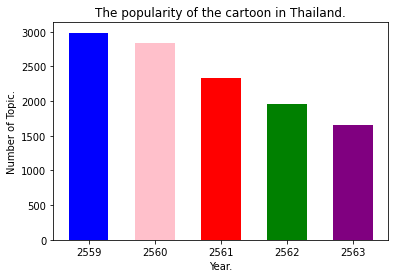

In [ ]:
import matplotlib.pyplot as plt

left = [1, 2, 3, 4, 5]

year_2563 = check_exc_2563.shape[0]
year_2562 = check_exc_2562.shape[0]
year_2561 = check_exc_2561.shape[0]
year_2560 = check_exc_2560.shape[0]
year_2559 = check_exc_2559.shape[0]

height = [year_2559,year_2560,year_2561,year_2562,year_2563]
  
tick_label = ['2559', '2560', '2561', '2562', '2563']
  
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['blue','pink','red','green','purple'])
  
plt.xlabel('Year.')

plt.ylabel('Number of Topic.')

plt.title('The popularity of the cartoon in Thailand.')
  
plt.show()

จากกราฟดังกล่าวอาจจะสรุปได้ว่าการ์ตูนในประเทศไทยได้รับความนิยมลดลง